# Algorithmic lattice surgery example: A simple graph with CNOTs.

In this notebook, we will build a simple PyZX circuit composed of three CNOTs and transform it into a topologically-correct space-time diagram using algorithmic lattice surgery.

The circuit is specifically chosen to demonstrate the foundational spatial operations performed by the algorithm. This noteboook does not cover phases, Pauli webs, or any other information PyZX can give.

In [1]:
import os
import sys
import pyzx as zx

root_folder = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if root_folder not in sys.path:
    sys.path.insert(0, root_folder)

from scripts.runner import runner
from utils.interop_pyzx import get_simple_graph_from_pyzx

zx.settings.colors = zx.rgb_colors
%matplotlib widget

## Input: Preparing and distilling a ZX graph

### Preparing a PyZX Graph

Let's start by preparing a PyZX graph. We'll use a simple graph for this notebook, consisting of three CNOTs.

In [2]:
circuit_name = "CNOTs"

c = zx.Circuit(2)
c.add_gate("CNOT", 0, 1)
c.add_gate("CNOT", 1, 0)
c.add_gate("CNOT", 1, 0)

pyzx_graph = c.to_graph()

zx.draw(pyzx_graph, labels=True)

### Distilling the PyZX graph into a simpler graph that the algorithm can consume

PyZX graphs can have a lot of information that the algorithm does not need to places the spiders in the 3D space. So, let's convert this graph into a `simple_graph`, i.e., a dictionary of nodes and edges, before feeding it into the algorithm. 

There is a single instruction that achieves this by undertaking all steps below:
- Dump the entire PyZX graph into a dictionary using PyZX internal methods,
- Transform into a dictionary with clear syntax for 3D positioning but all values zeroed out,
- Distill the 3D dictionary into a simpler dictionary for consumption by the algorithm.

In [3]:
simple_graph = get_simple_graph_from_pyzx(pyzx_graph)
print(simple_graph)

{'nodes': [(0, 'O'), (1, 'O'), (2, 'X'), (3, 'Z'), (4, 'X'), (5, 'Z'), (6, 'X'), (7, 'Z'), (8, 'O'), (9, 'O')], 'edges': [((0, 3), 'SIMPLE'), ((1, 2), 'SIMPLE'), ((2, 3), 'SIMPLE'), ((2, 5), 'SIMPLE'), ((3, 4), 'SIMPLE'), ((4, 5), 'SIMPLE'), ((4, 6), 'SIMPLE'), ((5, 7), 'SIMPLE'), ((6, 7), 'SIMPLE'), ((6, 8), 'SIMPLE'), ((7, 9), 'SIMPLE')]}


It is possible to see from the printout that the information in the `simple_graph` is limited to the IDs and types of nodes and edges. As noted, this might mean much of the original information in some PyZX graphs is eliminated prior consumption by the algorithm.

There is no need to worry about this. The algorithm does not need additional information to carry out its foundational operations.

Additionally, if any of the additional information originally in the graph is needed (not the case in this notebook), there are complementary operations that allow recovering this information and applying it to the resulting space-time diagram.

## Process: Running the algorithm

The next step is to feed the `simple_graph` to the algorithm and let it work its magic (it's not magic, but let's pretend it is). This can be achieved with a single command that gets the entire process running and produces a number of outputs that give insight into the process and the final space-time diagram resulting from the algorithmic lattice surgery.

The algorithm will run up to ten times.
- If a run is unsuccessful, it will throw away the run and start again.
- If a run is successful, the algorithm will return a number of objects for further use (we'll look at them closer later in the notebook) and produce:
  - an animation with key stages of the process, saved to `./outputs/media/`,
  - a detailed node-by-node/edge-by-edge printout of results, saved to `./outputs/txt/`,
  - and an interactive visualisation, displayed on screen.

To better understand the process, the code below prints the PyZX graph before running the algorithm. Look at the nodes closely and compare with the updates by the algorithm.

The algorithm picks a node with a high number of edges as starting point and places it in the 3D space. It then places the neighbours of this node. After, it takes one of the neighbours and place its neighbours. And so forth until it runs out of nodes. Each update highlights the order in which nodes are placed with IDs corresponding to the IDs of the original PyZX graph.

**Note 1.** There is a `max_attempts=1` optional parameter in the runner function. You might need to run the code several times to get a final successful result. The standard `max_iter` is 10 to give the algorithm a few chances of finding a solution. That said, the limit in this Jupyter notebook is of only one iteration because the notebook will show step-by-step visualisations of the entire process. This would be confusing if the algorithm iterates more than once automatically.

**Note 2.** Each visualisation is an interactive 3D panel. They take a bit to load, but you can turn them around to examine the results from all directions.



#################################################### 
STARTING ALGORITHM FROM CLEAN SLATE 
Attempt 1 
####################################################

Placing first node.
3: ((0, 0, 0) 'xzz').

Creating path. Node ID (source): 3 ((0, 0, 0), 'xzz') --> Node ID (target): 0 ((?, ?, ?), ???) (ZX type: O)
Original ZX type for edge: SIMPLE
6 viable paths created. Algorithm picks best...
Chosen path: [((0, 0, 0), 'Z'), 'SIMPLE EDGE', ((0, 3, 0), 'BOUNDARY')]


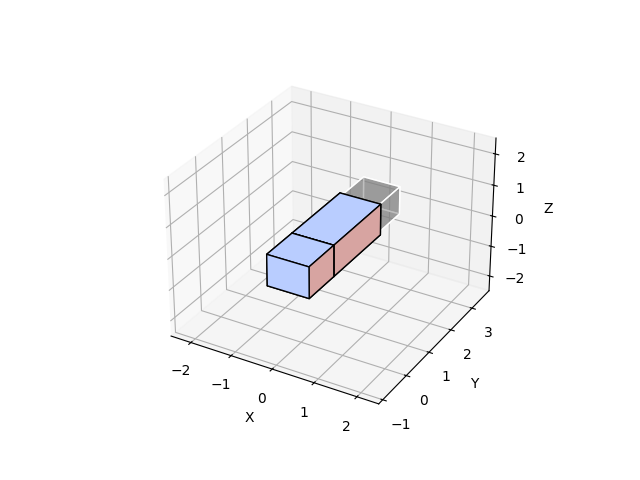


Creating path. Node ID (source): 3 ((0, 0, 0), 'xzz') --> Node ID (target): 2 ((?, ?, ?), ???) (ZX type: X)
Original ZX type for edge: SIMPLE
11 viable paths created. Algorithm picks best...xx..x..x
Chosen path: [((0, 0, 0), 'Z'), 'SIMPLE EDGE', ((0, -3, 0), 'X')]


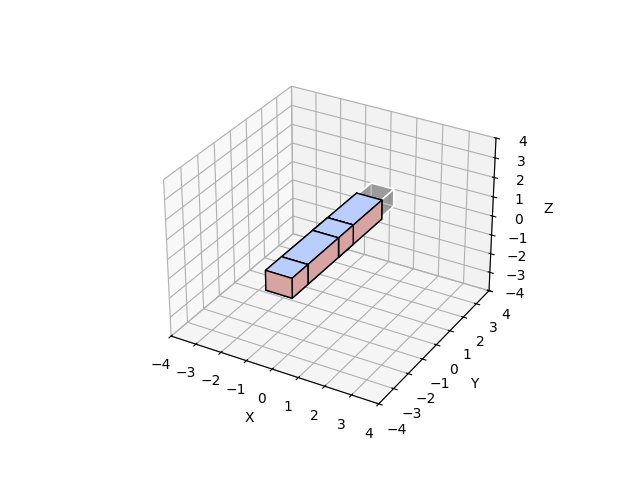


Creating path. Node ID (source): 3 ((0, 0, 0), 'xzz') --> Node ID (target): 4 ((?, ?, ?), ???) (ZX type: X)
Original ZX type for edge: SIMPLE
6 viable paths created. Algorithm picks best...x.xx.x
Chosen path: [((0, 0, 0), 'Z'), 'SIMPLE EDGE', ((0, 0, 3), 'X')]


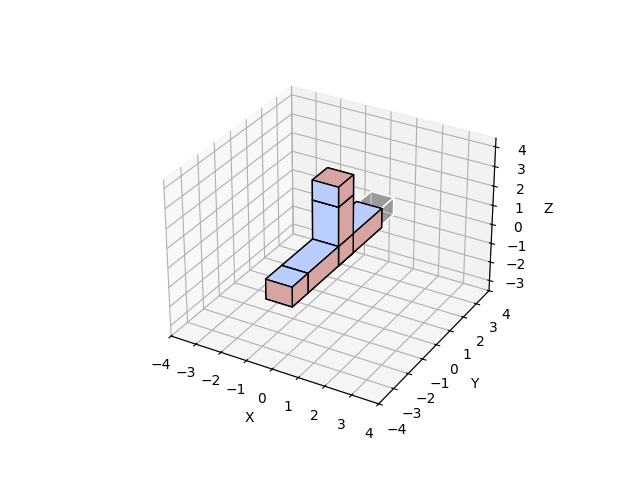


Creating path. Node ID (source): 2 ((0, -3, 0), 'xxz') --> Node ID (target): 1 ((?, ?, ?), ???) (ZX type: O)
Original ZX type for edge: SIMPLE
5 viable paths created. Algorithm picks best..
Chosen path: [((0, -3, 0), 'X'), 'SIMPLE EDGE', ((3, -3, 0), 'BOUNDARY')]


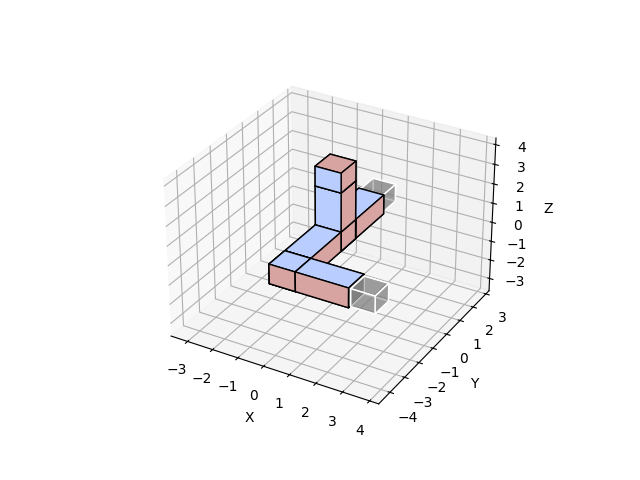


Creating path. Node ID (source): 2 ((0, -3, 0), 'xxz') --> Node ID (target): 5 ((?, ?, ?), ???) (ZX type: Z)
Original ZX type for edge: SIMPLE
9 viable paths created. Algorithm picks best.x.......
Chosen path: [((0, -3, 0), 'X'), 'SIMPLE EDGE', ((-3, -3, 0), 'Z')]


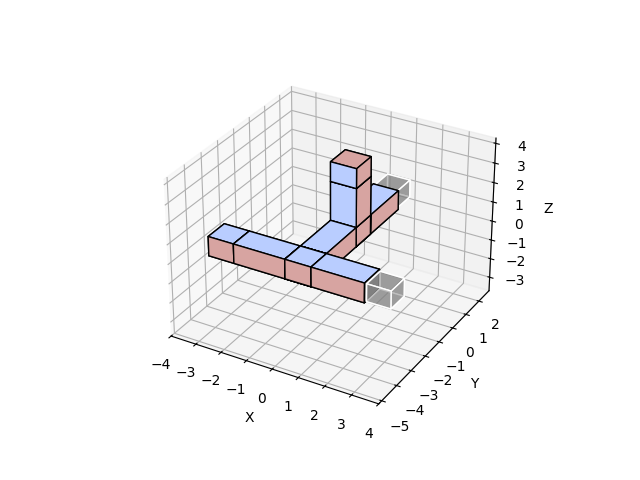


Creating path. Node ID (source): 4 ((0, 0, 3), 'xzx') --> Node ID (target): 6 ((?, ?, ?), ???) (ZX type: X)
Original ZX type for edge: SIMPLE
9 viable paths created. Algorithm picks best..x......x.x
Chosen path: [((0, 0, 3), 'X'), 'SIMPLE EDGE', ((3, 0, 3), 'X')]


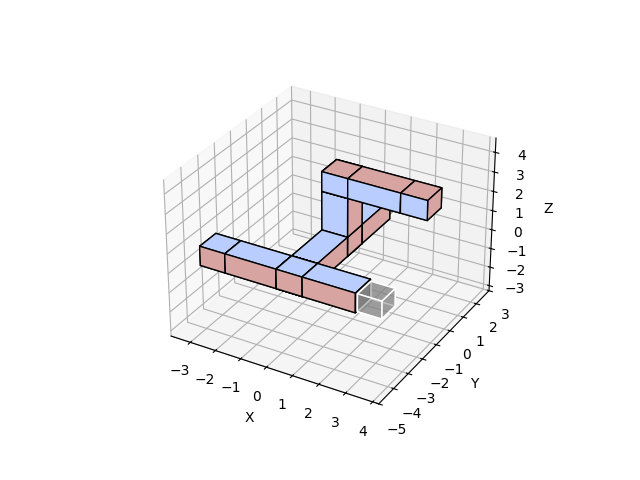


Creating path. Node ID (source): 5 ((-3, -3, 0), 'zxz') --> Node ID (target): 7 ((?, ?, ?), ???) (ZX type: Z)
Original ZX type for edge: SIMPLE
9 viable paths created. Algorithm picks best......xx.xx.
Chosen path: [((-3, -3, 0), 'Z'), 'SIMPLE EDGE', ((-6, -3, 0), 'Z')]


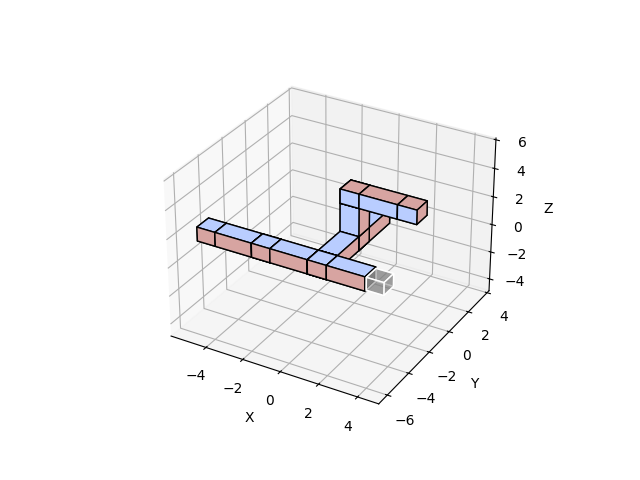


Creating path. Node ID (source): 6 ((3, 0, 3), 'xzx') --> Node ID (target): 8 ((?, ?, ?), ???) (ZX type: O)
Original ZX type for edge: SIMPLE
5 viable paths created. Algorithm picks best..
Chosen path: [((3, 0, 3), 'X'), 'SIMPLE EDGE', ((6, 0, 3), 'BOUNDARY')]


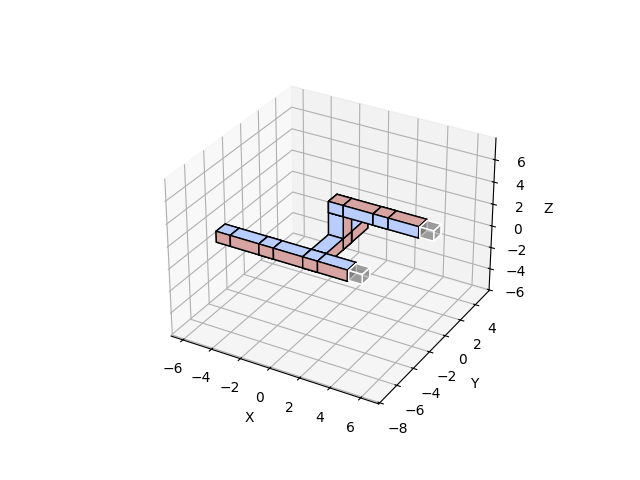


Creating path. Node ID (source): 7 ((-6, -3, 0), 'zxz') --> Node ID (target): 9 ((?, ?, ?), ???) (ZX type: O)
Original ZX type for edge: SIMPLE
5 viable paths created. Algorithm picks best..
Chosen path: [((-6, -3, 0), 'Z'), 'SIMPLE EDGE', ((-9, -3, 0), 'BOUNDARY')]


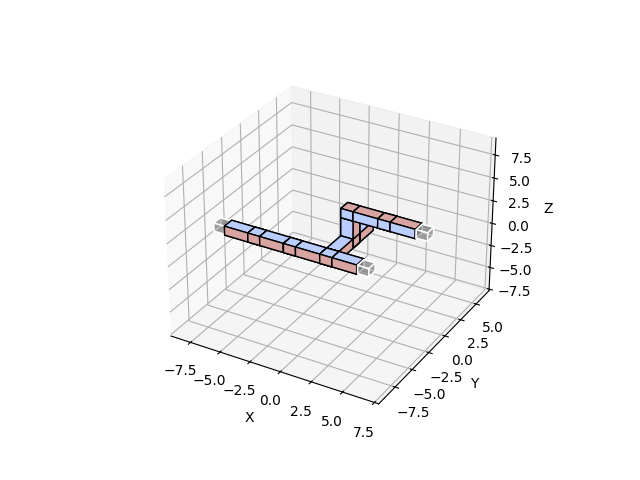


Finding path between placed nodes. Node ID: 4 (((0, 0, 3), 'xzx')) <--> Node ID: 5 ((-3, -3, 0), 'zxz')
Original ZX type for edge: SIMPLE
Path found: [((0, 0, 3), 'xzx'), ((-1, 0, 3), 'ozx'), ((-3, 0, 3), 'zzx'), ((-3, -1, 3), 'zox'), ((-3, -3, 3), 'zxx'), ((-3, -3, 2), 'zxo'), ((-3, -3, 0), 'zxz')]


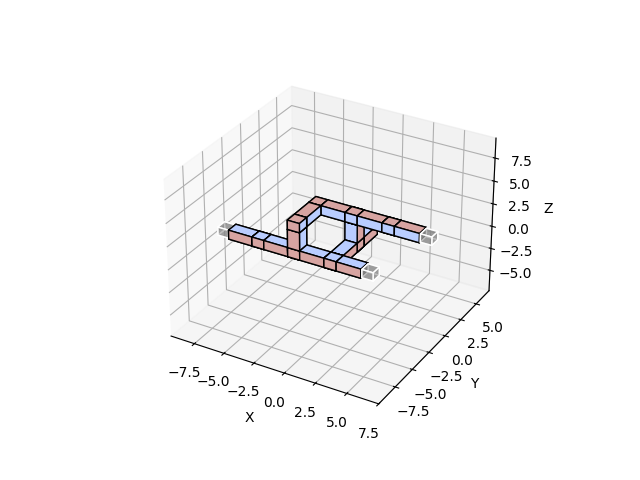


Finding path between placed nodes. Node ID: 6 (((3, 0, 3), 'xzx')) <--> Node ID: 7 ((-6, -3, 0), 'zxz')
Original ZX type for edge: SIMPLE
Path found: [((3, 0, 3), 'xzx'), ((3, 0, 4), 'xzo'), ((3, 0, 6), 'xzz'), ((3, -1, 6), 'xoz'), ((3, -3, 6), 'xxz'), ((2, -3, 6), 'oxz'), ((0, -3, 6), 'xxz'), ((-1, -3, 6), 'oxz'), ((-3, -3, 6), 'xxz'), ((-4, -3, 6), 'oxz'), ((-6, -3, 6), 'zxz'), ((-6, -3, 5), 'zxo'), ((-6, -3, 3), 'zxx'), ((-6, -3, 2), 'zxo'), ((-6, -3, 0), 'zxz')]


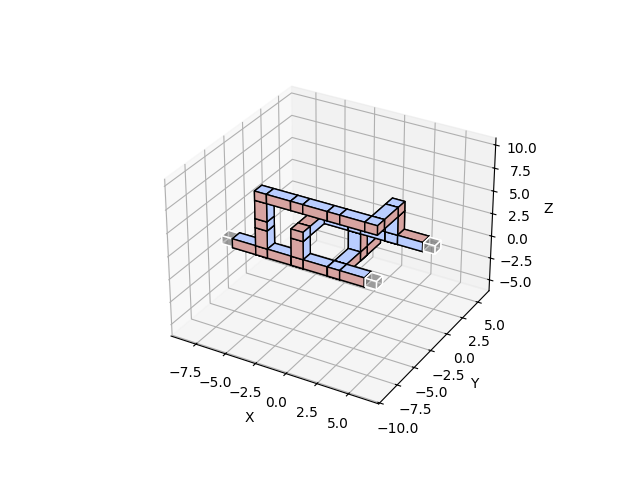

 

ALGORITHM SUCCEEDED! Total run time: 0.18 min 
Result saved to: C:\Users\polyz\Documents\drj\4_projects\algorithmic_lattice_surgery\outputs\txt/CNOTs.txt
Animation saved to C:\Users\polyz\Documents\drj\4_projects\algorithmic_lattice_surgery\outputs\media/CNOTs.gif


In [4]:
# Define weights for the value function to to choose best of several valid paths per each edge based on: (length of path, number of beams broken by path)
# A negative value for length of path favours short paths.
# A negative value for number of beams broken by path favours placements that do not block potential open faces requiring connections.
VALUE_FUNCTION_HYPERPARAMS = (-1, -0.5)

# Define a desired length of beams
# The longer the beams, the more space between faces. This feature needs improvement but, in theory, increases the odds of success.
# Needs to be combined with an equal or larger `MAX_PATHFINDER_SEARCH_SPACE`
LENGTH_OF_BEAMS = 3

# Define the maximum size of the search space (distance between source and target node for each pathfinding iteration)
# Larger values will produce a larger number of paths, and longer paths. This increases the odds of a successful result, with a significant impact on runtime.
MAX_PATHFINDER_SEARCH_SPACE = 3

kwargs = {
    "weights": VALUE_FUNCTION_HYPERPARAMS,
    "length_of_beams": LENGTH_OF_BEAMS,
    "max_search_space": MAX_PATHFINDER_SEARCH_SPACE,
}

zx.draw(pyzx_graph, labels=True)

simple_graph_after_use, edge_paths, lattice_nodes, lattice_edges = runner(
    simple_graph, circuit_name, strip_boundaries=False, hide_boundaries=False, max_attempts=1, visualise="detail", **kwargs
)

## Output: Using outputs

The algorithm returns four objects:
- `simple_graph_after_use`: the original `simple_graph` returned for convenience.
- `edge_paths`: a set of 3D edges where each edge corresponds to the original edges in the ZX graph but where the "nodes" have been exchanged for all 3D blocks and pipes needed to clear the edge in a 3D space (contains redundant nodes across edges).
- `lattice_nodes`: all nodes in `edge_paths` distilled into a single object with no redundant nodes.
- `lattice_edges`: all edges in `edge_paths` distilled into a single object with no redundant edges.

These objects can be used variously.

For instance, this is the stage where it would be possible to start linking elements in the result with additional information in the original PyZX graph.

Having said that, the circuit in this notebook does not have additional information, so we will limit ourselves to visualising how the algorithm constructed each edge by comparing the original PyZX graph with the `edge_paths` object.

This can be achieved both on a block-by-block basis as well as by reference to the original ZX kinds. Short edges containing a three step combination of block-pipe-block or node-edge-node are edges that the algorithm was able to clear easily by simply placing the next node. Long edges containing more than three items total correspond to edges the algorithm had to break into several segments to be able to clear the edge in the 3D space.

In [5]:
from utils.utils_zx_graphs import get_zx_type_from_kind

zx.draw(pyzx_graph, labels=True)

if edge_paths:
    for key, edge in edge_paths.items():
        block_by_block = []
        nodes_and_edges = []
        for node in edge["path_nodes"]:
            block_by_block.append(node[1])
            nodes_and_edges.append(get_zx_type_from_kind(node[1]))
        print(f"{key}: {"-".join(block_by_block)} ({" - ".join(nodes_and_edges)})")

(0, 3): xzz-xoz-ooo (Z - SIMPLE - BOUNDARY)
(2, 3): xzz-xoz-xxz (Z - SIMPLE - X)
(3, 4): xzz-xzo-xzx (Z - SIMPLE - X)
(1, 2): xxz-oxz-ooo (X - SIMPLE - BOUNDARY)
(2, 5): xxz-oxz-zxz (X - SIMPLE - Z)
(4, 6): xzx-ozx-xzx (X - SIMPLE - X)
(5, 7): zxz-oxz-zxz (Z - SIMPLE - Z)
(6, 8): xzx-ozx-ooo (X - SIMPLE - BOUNDARY)
(7, 9): zxz-oxz-ooo (Z - SIMPLE - BOUNDARY)
(4, 5): xzx-ozx-zzx-zox-zxx-zxo-zxz (X - SIMPLE - Z - SIMPLE - X - SIMPLE - Z)
(6, 7): xzx-xzo-xzz-xoz-xxz-oxz-xxz-oxz-xxz-oxz-zxz-zxo-zxx-zxo-zxz (X - SIMPLE - Z - SIMPLE - X - SIMPLE - X - SIMPLE - X - SIMPLE - Z - SIMPLE - X - SIMPLE - Z)
